#*** Movie Industry Descriptive Analysis***

---






## Importing Libraries

In [3]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
import plotly.figure_factory as ff
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
# Displays all rows and columns in dataset. However, takes more time to process 
pd.set_option('display.max_rows', None)

## Exploring Data
Finding errors, null values, duplicate data.

In [5]:
# Reading csv file from github

df = pd.read_csv('https://raw.githubusercontent.com/ynikhare/DataScience_Portfolio/main/movies.csv')
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [6]:
# Viewing the data types

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [7]:
# Checking if removing null values would impact the data making it uncredible
# This for loop gives us a percentage of the missing values

for col in df.columns:
    missing_percentage = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(missing_percentage*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [8]:
# Getting null values for each column

df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [9]:
# Finding Duplicate Data
# Looking for movie names with the same name though the data

duplicate_rows = df[df.duplicated('name')]
print(duplicate_rows)

                                 name     rating      genre  year  \
1360                         The Bear         PG  Adventure  1988   
1836                          Impulse          R      Crime  1990   
2022                         Paradise      PG-13      Drama  1991   
2104                    Forever Young         PG      Drama  1992   
2368                      Dream Lover          R      Drama  1993   
2438                    Boiling Point          R     Action  1993   
2537                    Nobody's Fool          R     Comedy  1994   
2643                             Heat          R      Crime  1995   
2667                         Bad Boys          R     Action  1995   
2724                     It Takes Two         PG     Comedy  1995   
2766                     Sudden Death          R     Action  1995   
2844                 Independence Day      PG-13     Action  1996   
2846                           Scream          R     Horror  1996   
2888                           Ham

## Data Cleaning

In [10]:
# Droping rows with null values

df = df.dropna()

In [11]:
# Removing duplicates

df = df.drop_duplicates('name')

duplicate_rows = df[df.duplicated('name')]
print(duplicate_rows)

Empty DataFrame
Columns: [name, rating, genre, year, released, score, votes, director, writer, star, country, budget, gross, company, runtime]
Index: []


In [12]:
# Changing Data types for better analysis

# Changing budget data type from float64 to int64
df['budget'] = df['budget'].astype('int64')

# Changing gross data type from float64 to int64
df['gross'] = df['gross'].astype('int64')

# Changing runtime data type from float64 to int64
df['runtime'] = df['runtime'].astype('int64')

# Changing votes data type from float64 to int64
df['votes'] = df['votes'].astype('int64')

In [13]:
# Creating a new column for correct year as given data has some variance

df['year_correct'] = df['released'].astype(str).str.extract(r',.(\b\d+)')

In [14]:
# Checking null values
df.isnull().sum()

name             0
rating           0
genre            0
year             0
released         0
score            0
votes            0
director         0
writer           0
star             0
country          0
budget           0
gross            0
company          0
runtime          0
year_correct    14
dtype: int64

In [15]:
# Checking the cause for null values

df1 = df[df.isna().any(axis=1)]
print (df1)

                             name     rating      genre  year  \
312          Five Days One Summer         PG      Drama  1982   
449                 Getting It on          R     Comedy  1983   
467          My Brother's Wedding  Not Rated      Drama  1983   
800               O.C. and Stiggs          R     Comedy  1985   
1173  The House on Carroll Street         PG   Thriller  1987   
1212                 Five Corners          R      Crime  1987   
1404                Stormy Monday          R      Crime  1988   
1819        Come See the Paradise          R      Drama  1990   
2029                  Liebestraum          R    Mystery  1991   
2318                  Killing Zoe          R      Crime  1993   
2319                       Cronos          R    Fantasy  1993   
2816            The White Balloon    Unrated      Drama  1995   
4187                       Dahmer          R  Biography  2002   
5833                   Hatchet II          R     Action  2010   

                        

In [16]:
# Matching those columns
df['year_correct'] = df['released'].str.extract(r'(\d{4})').astype(int)
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score    votes         director  \
0  June 13, 1980 (United States)    8.4   927000  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime  year_correct  
0   46998772        Warner Bros.      146          1980  
1   58853106   Columbia Pictures      104          1980  
2  538375067           Lucasfilm      124          1980  
3   83453539  Paramount Pictures       88          1980  
4   39846344      Orion Pictures       98          1980

In [17]:
df.isnull().sum()

name            0
rating          0
genre           0
year            0
released        0
score           0
votes           0
director        0
writer          0
star            0
country         0
budget          0
gross           0
company         0
runtime         0
year_correct    0
dtype: int64

In [18]:
# To make sure there are no null values
df1 = df[df.isna().any(axis=1)]
print (df1)

Empty DataFrame
Columns: [name, rating, genre, year, released, score, votes, director, writer, star, country, budget, gross, company, runtime, year_correct]
Index: []


In [19]:
# Checking if our columns match using correlation technique
df.corr()

year     score     votes    budget     gross   runtime  \
year          1.000000  0.061236  0.207542  0.326118  0.271863  0.075414   
score         0.061236  1.000000  0.473250  0.071325  0.222235  0.413459   
votes         0.207542  0.473250  1.000000  0.438567  0.618162  0.348798   
budget        0.326118  0.071325  0.438567  1.000000  0.737723  0.317912   
gross         0.271863  0.222235  0.618162  0.737723  1.000000  0.276189   
runtime       0.075414  0.413459  0.348798  0.317912  0.276189  1.000000   
year_correct  0.998707  0.066723  0.204546  0.318617  0.266149  0.075648   

              year_correct  
year              0.998707  
score             0.066723  
votes             0.204546  
budget            0.318617  
gross             0.266149  
runtime           0.075648  
year_correct      1.000000

# Descriptive Analysis

### 1. Viewing all data measures
### 2. Finding correlation between variables
### 3. Using visualization to show and compare correlation and other attributes
### 4. Conclusions

### 1. Viewing all data measures:

In [44]:
# Making float numbers more readable
pd.options.display.float_format = "{:.1f}".format

In [45]:
# Getting numerical values in dataset
df.describe(include = [np.number]).T

count        mean         std    min        25%        50%  \
year    5336.0      2001.5        10.5 1980.0     1993.0     2002.0   
score   5336.0         6.4         1.0    1.9        5.8        6.5   
votes   5336.0    114229.7    183538.3  195.0    19000.0    52000.0   
budget  5336.0  35649050.4  41241714.7 6000.0 10000000.0 21000000.0   
gross   5336.0 101592426.2 184167193.6  309.0 10622833.8 35927567.0   
runtime 5336.0       108.1        18.1   63.0       95.0      105.0   

                75%          max  
year         2010.0       2020.0  
score           7.1          9.3  
votes      128000.0    2400000.0  
budget   45000000.0  356000000.0  
gross   110353970.0 2847246203.0  
runtime       118.0        271.0

In [46]:
# Converting year_correct to string to get the year with most movie released
df['year_correct'] = df['year_correct'].astype(str)

df.describe(include = ['O']).T

count unique                              top  freq
name          5336   5336                      The Shining     1
rating        5336     10                                R  2557
genre         5336     15                           Comedy  1483
released      5336   2546  August 26, 2016 (United States)     7
director      5336   2045                      Woody Allen    33
writer        5336   3178                      Woody Allen    32
star          5336   1830                     Nicolas Cage    39
country       5336     50                    United States  4251
company       5336   1464               Universal Pictures   328
year_correct  5336     41                             2002   167

In [47]:
# Conclusions:

# Highest counts for rating is R rated
# Highest counts for genre is Comedy 
# Woody Allen directed and wrote most 33 and 32 movies respectively putting him on the top. 
# Nicolas Cage starred in 39 movies
# Most number of movies were released in year 2002, 167 movies

In [48]:
# Converting back the year_correct to int64 to its original type
df['year_correct'] = df['year_correct'].astype(int)

### 2. Finding Correlation

In [49]:
# Note: Methodes of correlation are Pearson (default), Kendall, and Spearman
df.corr()

year  score  votes  budget  gross  runtime  year_correct
year           1.0    0.1    0.2     0.3    0.3      0.1           1.0
score          0.1    1.0    0.5     0.1    0.2      0.4           0.1
votes          0.2    0.5    1.0     0.4    0.6      0.3           0.2
budget         0.3    0.1    0.4     1.0    0.7      0.3           0.3
gross          0.3    0.2    0.6     0.7    1.0      0.3           0.3
runtime        0.1    0.4    0.3     0.3    0.3      1.0           0.1
year_correct   1.0    0.1    0.2     0.3    0.3      0.1           1.0

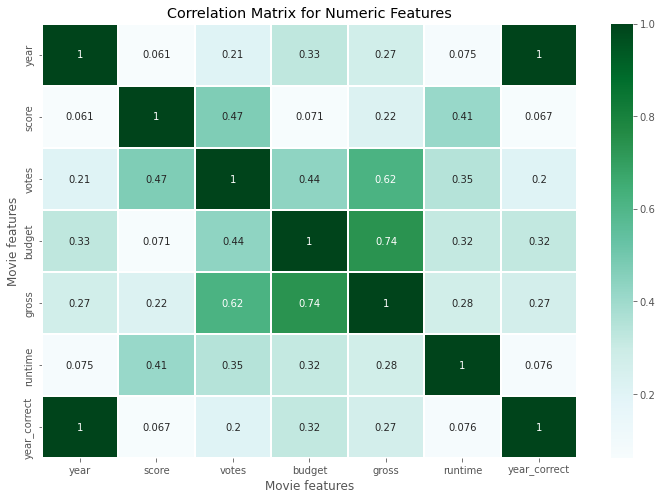

In [50]:
# HeatMap for Correlation

corma = df.corr()

sns.heatmap(corma, linecolor='white',linewidths=1 , annot = True, cmap="BuGn")

plt.title("Correlation Matrix for Numeric Features")
plt.xlabel("Movie features")
plt.ylabel("Movie features")

plt.show()

In [51]:
# Assigning a random unique numerric value to the variables

df_num = df.copy()

for column in df_num.columns:
    if (df_num[column].dtype == 'object' ):
        df_num[column] = df_num[column].astype('category')
        df_num[column] = df_num[column].cat.codes 

df_num

name  rating  genre  year  released  score    votes  director  writer  \
0     4692       6      6  1980      1297    8.4   927000      1779    2809   
1     3929       6      1  1980      1120    5.8    65000      1566    1147   
2     3641       4      0  1980      1352    8.7  1200000       752    1800   
3      204       4      4  1980      1120    7.7   221000       884    1400   
4      732       6      4  1980      1163    7.3   108000       715     347   
5     1509       6      9  1980      1913    6.4   123000      1743    3056   
6     3930       6      0  1980      1352    7.9   188000       968     570   
7     3122       6      3  1980       528    8.2   330000      1261    1245   
8     3732       4      0  1980      1339    6.8   101000      1594    1389   
9     4401       6      3  1980      1748    7.0    10000      1993     276   
10     332       4      0  1980       508    6.1    18000       236    2787   
11    4179       4      1  1980      2259    7.3    54000       812    1288   
12    3029       4      1  1980       469    5.3    30000      1630    1641   
13    2859       6      6  1980      2403    7.7    49000      1653    1636   
14    1208       6      5  1980      1163    7.1    37000       207     346   
15    3553       4      6  1980      2281    7.2    27000       842    2486   
17      66       4      4  1980       528    6.9    29000       333    2294   
18    4143       6      9  1980       828    6.8    66000       937    1472   
20     986       6      5  1980       710    6.5    20000      2014    3125   
21    1762       6      1  1980       117    6.8    14000      1296    2044   
22    4128       4      0  1980       212    6.7    22000       498    2935   
23    5289       4      8  1980       435    5.3    12000      1641    2471   
28     700       6      5  1980      1352    7.2    17000      1853    3073   
29     261       6      5  1980       664    6.2    22000      1477    2337   
33     785       4      6  1980       117    6.1      604      1139     666   
35    3068       6      4  1980      2144    6.2    24000       739    2186   
36    4245       6      4  1980      1876    6.3     4300       577     957   
37    2618       6      4  1980      2244    6.0    11000      1110    2557   
42    4736       6      0  1980      1406    7.1     9000      1601    1784   
46    4312       6      0  1980      1297    5.3     3900      1326    2362   
48    4512       4      0  1980      1913    5.1     3100       329    2015   
50    3648       4      4  1980      2463    7.3    22000      2025    3158   
51    2497       6      4  1980      2403    6.8     4500      1019     299   
53     692       4      0  1980      1282    6.1    11000       327     760   
56    5193       4      0  1980      1622    4.6     2600       788    1067   
57    2818       4      4  1980      1047    5.4     2400       908    2602   
58    4519       6      0  1980       260    5.1     5200       547    1801   
75    4351       1      1  1980      1392    5.8     1300       267     931   
77    5240       6      4  1980       260    5.9      415      1472    1327   
80    2971       6      6  1980      2537    4.0      546       963    1003   
92    1973       4      0  1981      1289    8.4   905000      1842    1788   
94     284       6      4  1981       313    7.5    97000       968    1509   
95    1301       6      0  1981      1036    7.2   131000       937    1472   
96    4100       2      9  1981        46    7.5   192000      1721    2684   
97    3031       6      4  1981      1561    6.2    40000       177     303   
98     603       6      5  1981      1155    7.4    47000       207     346   
99     861       4      0  1981      1289    6.9    42000       474     273   
100   1329       6      1  1981        11    7.4    59000       931    2939   
101   2389       6      0  1981      1798    7.6   170000       650    2918   
103   3699       6      4  1981      1399    6.9    6800

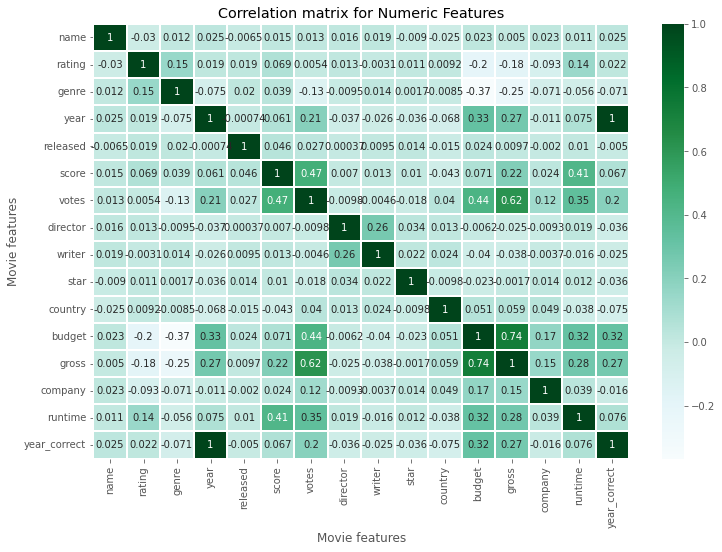

In [52]:
# Correlation HeatMap for all variables

corma = df_num.corr()

sns.heatmap(corma, linecolor='white',linewidths=1 , annot = True, cmap="BuGn")

plt.title("Correlation matrix for Numeric Features")
plt.xlabel("Movie features")
plt.ylabel("Movie features")

plt.show()

In [53]:
# Overview of correlation
cormax = df_num.corr()
cormaxstack = cormax.unstack()
scmstack = cormaxstack.sort_values()
scmstack

genre         budget         -0.4
budget        genre          -0.4
genre         gross          -0.2
gross         genre          -0.2
rating        budget         -0.2
budget        rating         -0.2
gross         rating         -0.2
rating        gross          -0.2
votes         genre          -0.1
genre         votes          -0.1
company       rating         -0.1
rating        company        -0.1
genre         year           -0.1
year          genre          -0.1
year_correct  country        -0.1
country       year_correct   -0.1
year_correct  genre          -0.1
genre         year_correct   -0.1
              company        -0.1
company       genre          -0.1
year          country        -0.1
country       year           -0.1
runtime       genre          -0.1
genre         runtime        -0.1
country       score          -0.0
score         country        -0.0
writer        budget         -0.0
budget        writer         -0.0
writer        gross          -0.0
gross         

In [54]:
# Highest correlation
scmstack[((scmstack) > 0.5) & ((scmstack) < 1.0)].sort_values(ascending = False)

year          year_correct   1.0
year_correct  year           1.0
gross         budget         0.7
budget        gross          0.7
votes         gross          0.6
gross         votes          0.6
dtype: float64

### 3. Data Visualization

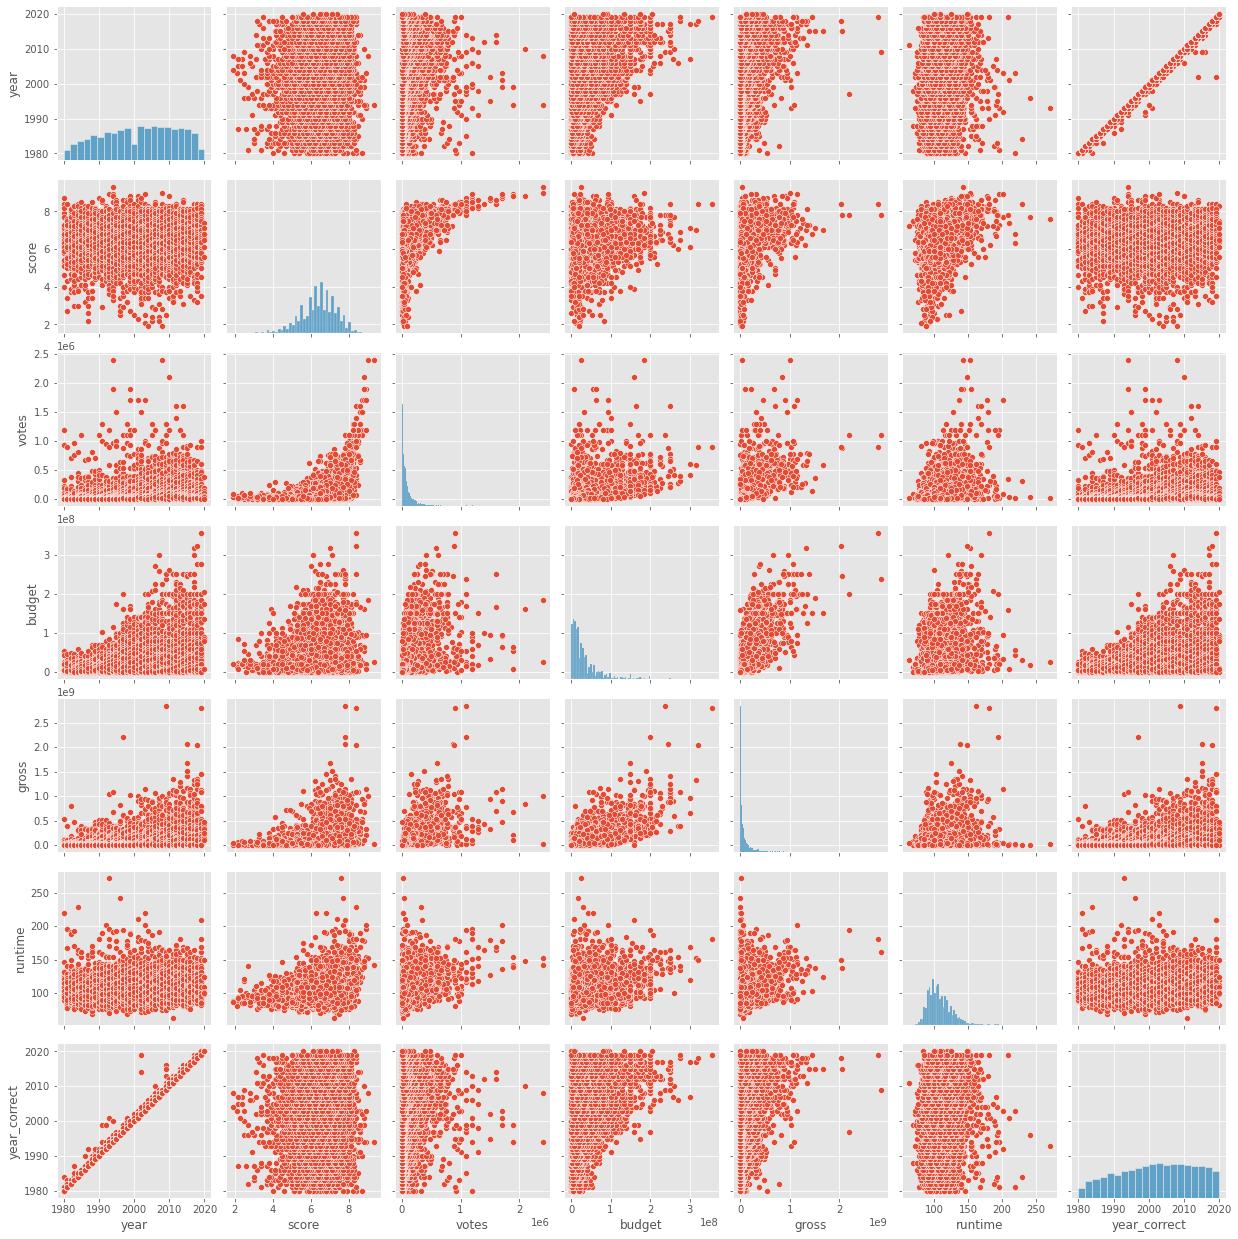

In [55]:
# Overview of all visualization between different variables
sns.pairplot(df,diag_kind ='hist')

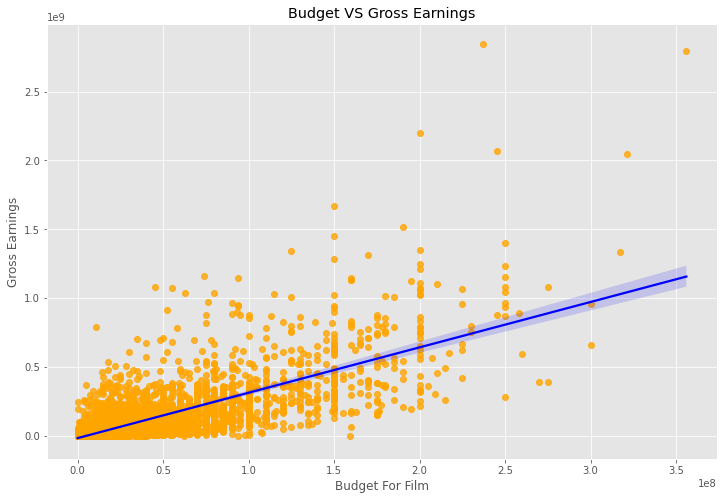

In [56]:
# Plotting the Budget Vs Gross using Seaborn (Highest correlation)

sns.regplot(x='budget',y='gross',data=df, scatter_kws = {'color' : 'orange'}, line_kws = {'color' : 'blue'})

plt.title('Budget VS Gross Earnings')
plt.xlabel('Budget For Film')
plt.ylabel('Gross Earnings')

plt.show()

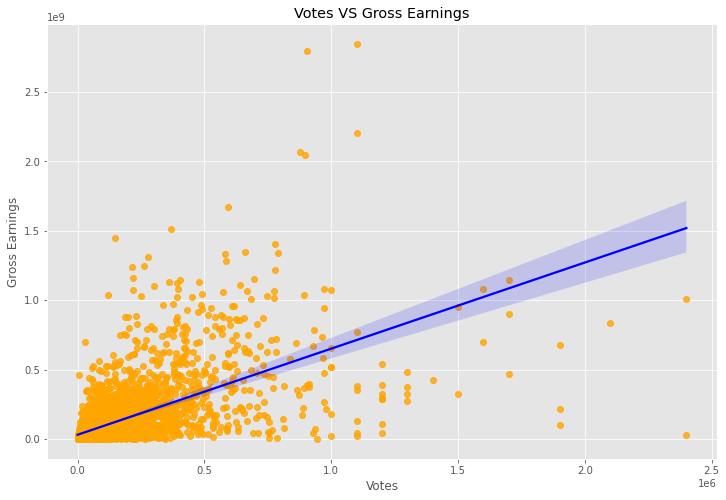

In [57]:
# Plotting the Votes Vs Gross usnig Seaborn

sns.regplot(x='votes',y='gross',data=df, scatter_kws = {'color' : 'orange'}, line_kws = {'color' : 'blue'})

plt.title('Votes VS Gross Earnings')
plt.xlabel('Votes')
plt.ylabel('Gross Earnings')

plt.show()

In [58]:
# Making a new dataframe for the company's budget and gross sum and sorting them
com = df.groupby('company')['budget','gross'].sum().sort_values(by = 'gross', ascending = False)
com.head(10) 

# Reset the index and taking only the top 10 comapnies

top_ten_c = com.reset_index()
top_ten_c = top_ten_c.head(10)
top_ten_c

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


company       budget        gross
0           Warner Bros.  19149300000  53402787586
1     Universal Pictures  15824130001  50762944661
2      Columbia Pictures  15011107000  40870093831
3  Twentieth Century Fox  11339600000  39333826704
4     Paramount Pictures  13323450000  38995978170
5   Walt Disney Pictures   9876700000  32859517114
6        New Line Cinema   5396200000  18774065284
7         Marvel Studios   2444000000  13546776896
8   DreamWorks Animation   3344000000  11873612858
9    Dreamworks Pictures   3702700000  10924475124

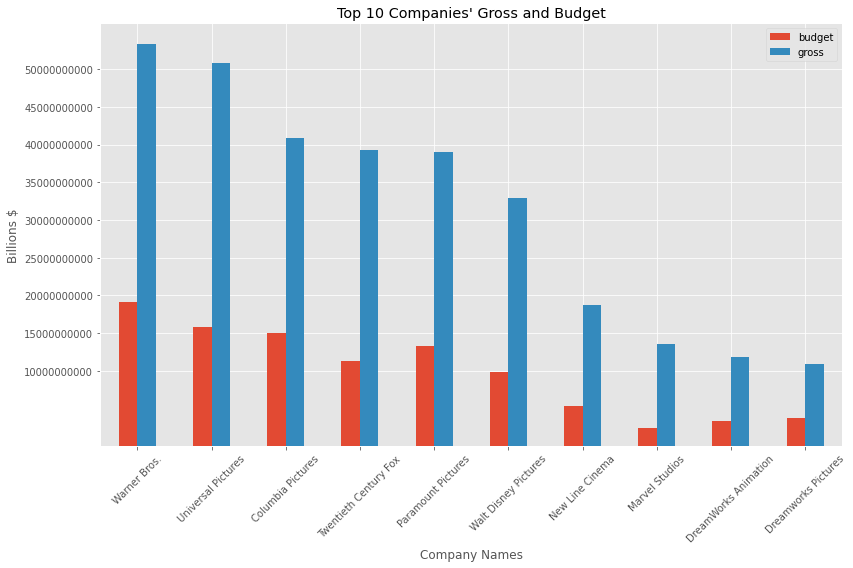

In [59]:
# Ploting the Top 10 Companies by Gross and Budget
ax = top_ten_c.plot.bar(x ='company', rot = 0 )

plt.title("Top 10 Companies' Gross and Budget")
plt.xlabel("Company Names")
plt.ylabel("Billions $")

# Defining x-axis
plt.xticks(ticks = [0,1,2,3,4,5,6,7,8,9] , rotation = '45')

# Defining y-axis
plt.yticks(range(10000000000, 55000000000, 5000000000))
vals = ax.get_yticks()

# Changing the format of axis
ax.set_yticklabels(['{:.0f}'.format(x) for x in vals]) 

plt.tight_layout()
plt.show()

In [60]:
# Making a new dataframe for the top 10 companies with the most movie releases

company = df['company'].value_counts()
company = pd.DataFrame(company) 
company = company.head(10) 
company

company
Universal Pictures             328
Columbia Pictures              295
Warner Bros.                   294
Paramount Pictures             274
Twentieth Century Fox          207
New Line Cinema                151
Touchstone Pictures            104
Walt Disney Pictures           104
Metro-Goldwyn-Mayer (MGM)       96
TriStar Pictures                75

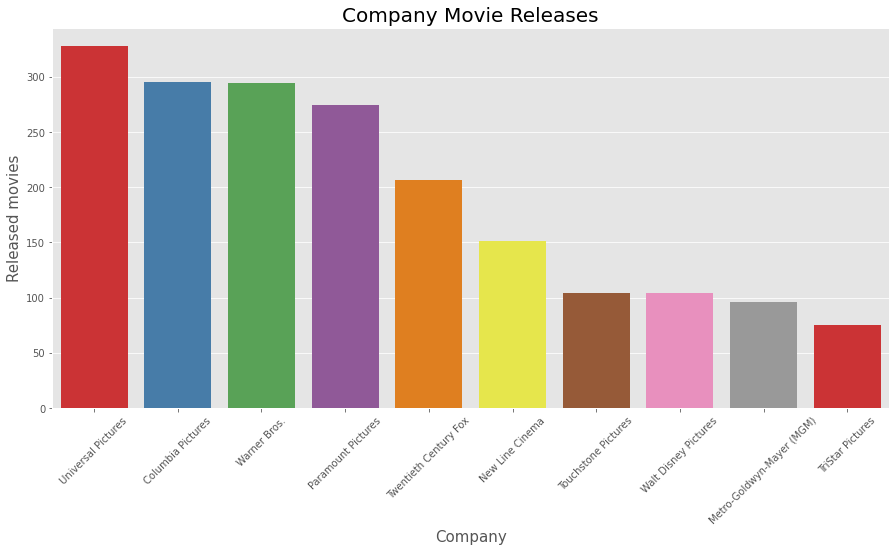

In [61]:
# Plotting the companies with the most releases 

sns.barplot(x = company.index, y = company['company'] , palette="Set1")

labels = company.index.tolist()
plt.gcf().set_size_inches(15, 7)
plt.title('Company Movie Releases', fontsize = 20)
plt.xlabel('Company', fontsize = 15)
plt.ylabel('Released movies', fontsize = 15)

# Defining the x-axis
plt.xticks(ticks = [0,1,2,3,4,5,6,7,8,9] , labels = labels, rotation = '45')
plt.show()

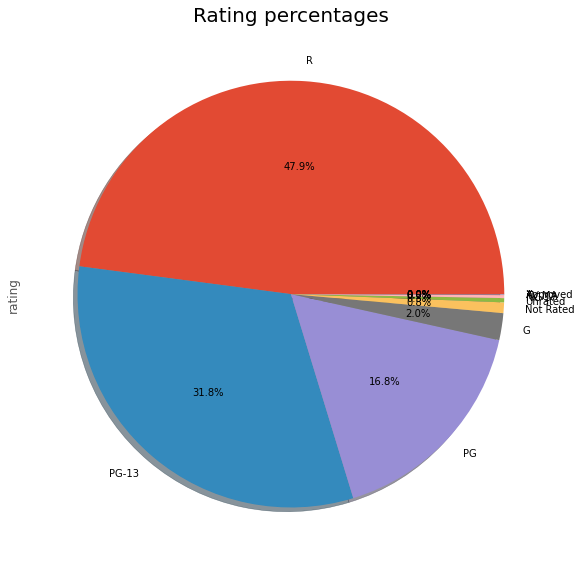

In [62]:
# Plotting the Rating comparison

df['rating'].value_counts().plot.pie(autopct = '%1.1f%%',shadow = True,figsize = (12,8))

plt.title('Rating percentages', fontsize = 20)
plt.tight_layout()
plt.show()

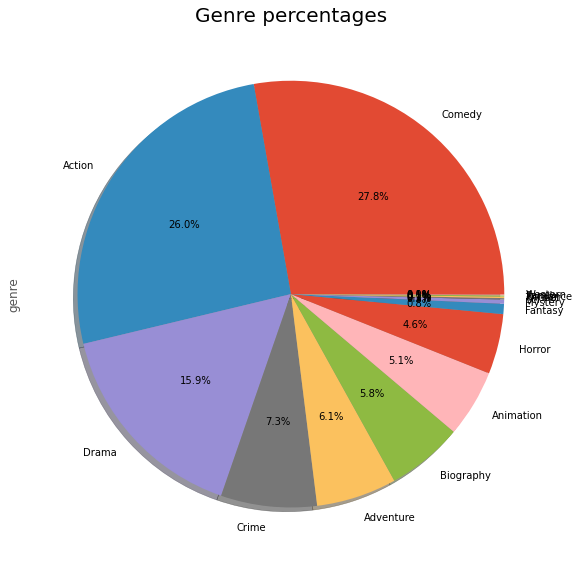

In [63]:
# Plotting the Genre comparison

df['genre'].value_counts().plot.pie(autopct = '%1.1f%%',shadow = True,figsize = (12,8))

plt.title('Genre percentages', fontsize = 20)
plt.tight_layout()
plt.show()

### 4. Conclusion




*   The data available is from year 1980 to 2020.
*   The average film duration is 2h 33m.
*   Highest counts for rating is R rated.
*   Highest counts for genre is Comedy.
*   Woody Allen directed and wrote most 33 and 32 movies respectively putting him on the top. 
*   Nicolas Cage starred in 39 movies.
*   Most number of movies were released in year 2002, 167 movies.
*   Highest correlation between budget and gross suggests that more the budget of movie, more it earns.
*   Warner Bros has released less movies than Columbia Pictures and Universal Pictures, however still it has the highest grossing when combined.
